# LAB 3

## SciKit

In [20]:
import sklearn

In [21]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [23]:
data = np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])

In [24]:
x = data [:,0]

In [25]:
y = data[:,1]

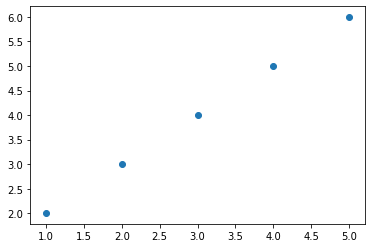

In [26]:
plt.scatter(x,y)

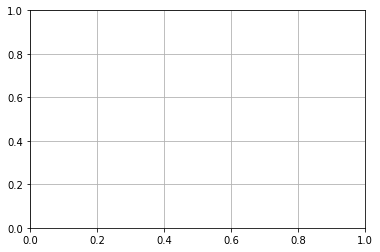

In [27]:
plt.grid(True)

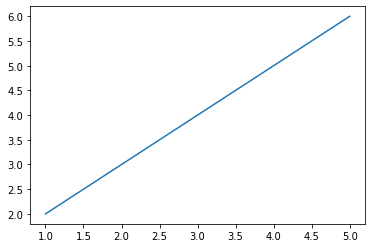

In [28]:
plt.plot(x,y)

In [29]:
plt.show() #Si no guarda en memoria no anda, al parecer

### Procesamiento de texto

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorizer = CountVectorizer(min_df=1)

Extraemos una "bolsa" de palabras:

In [32]:
content = ["How to format my hard disk","Hard disk format problems"]

In [33]:
X = vectorizer.fit_transform(content)

In [34]:
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [35]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [36]:
X.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [37]:
X.toarray()[1,2]

1

### 20 Newsgroups

In [38]:
from sklearn.datasets import fetch_20newsgroups

Uso solo las categorías: ateísmo, cristianismo, graficos y medicina"

In [39]:
categories = ['alt.atheism','soc.religion.christian','comp.graphics','sci.med']

In [40]:
twenty_train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=42)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer()

In [43]:
train_counts = vectorizer.fit_transform(twenty_train.data)

In [44]:
vectorizer.vocabulary_.get('algorithm')

4690

In [45]:
len(vectorizer.get_feature_names())

35788

In [46]:
Vectorizer = CountVectorizer(stop_words = 'english')

In [47]:
sorted(Vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

### Preprocesamiento avanzado

In [48]:
import nltk

In [49]:
steammer = nltk.stem.SnowballStemmer('english')

In [50]:
steammer.stem("cats")

'cat'

In [51]:
steammer.stem("loving")

'love'

In [52]:
from nltk.tokenize import word_tokenize

In [53]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
text = word_tokenize("And now for something completely different")

In [55]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rama\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [56]:
nltk.download("maxent_treebank_pos_tagger")

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Rama\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [57]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

### SckiKit-learn

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
vectorizer = CountVectorizer(stop_words="english")

In [60]:
analyze = vectorizer.build_analyzer()

In [61]:
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

In [62]:
import nltk.stem

In [63]:
english_stemmer = nltk.stem.SnowballStemmer("english")

In [64]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [65]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words="english")

In [66]:
stem_analyze = stem_vectorizer.build_analyzer()

In [67]:
Y = stem_analyze("John bought carrots and potatoes")

In [68]:
for tok in Y:
    print(tok)

john
bought
carrot
potato


In [69]:
from sklearn.datasets import fetch_20newsgroups

In [70]:
categories = ["alt.atheism","soc.religion.christian","comp.graphics","sci.med"]

In [71]:
twenty_train = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [72]:
train_counts = stem_vectorizer.fit_transform(twenty_train.data)

In [73]:
len(stem_vectorizer.get_feature_names())

26888

### Español

Importo stop_words en español (y, o, etc)

In [74]:
from nltk.corpus import stopwords

In [75]:
stop_words_es = stopwords.words('spanish')

In [76]:
vectorizerEs = CountVectorizer(stop_words = stop_words_es)

In [77]:
analyze = vectorizer.build_analyzer()

Analizo una oración en español quitando las stop_words

In [78]:
phrase = "¿Paul, John y George... y Ringo? ¿Alguien recordaba a Ringo?"

In [79]:
analyze(phrase)

['paul', 'john', 'george', 'ringo', 'alguien', 'recordaba', 'ringo']

Ahora vamos a hacer un stemmer:

In [80]:
spanish_stemmer = nltk.stem.SnowballStemmer("spanish")

In [81]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (spanish_stemmer.stem(w) for w in analyzer(doc))

In [82]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words= stop_words_es)

In [83]:
stem_analyze = stem_vectorizer.build_analyzer()

In [84]:
Z = stem_analyze(phrase)

In [85]:
for token in Z:
    print(token)

paul
john
georg
ring
algui
record
ring


Se puede notar que recorta las palabras de una manera un tanto excesiva, puede llegar a confundir en un futuro con otras raíces posibles. Otro ejemplo:

In [86]:
phrase2 = "Similitudes que soñás, lugares que no existen pero vuelves a pasar. Errores ópticos del tiempo y de la luz, Oh no"

In [87]:
Z2 = stem_analyze(phrase2)

In [88]:
for token in Z2:
    print(token)

similitud
soñas
lugar
exist
vuelv
pas
error
optic
tiemp
luz
oh


Ahora con un corpus en español. Utilizo el CESS_ESP que pertenece a textos de la Universidad de Barcelona:

In [89]:
import nltk

In [90]:
from nltk.corpus import cess_esp

In [91]:
cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [93]:
# No es un dataset